In [1]:
########################################################
# ConvertAcceleration_FitConstant
#
# This notebook converts acceleration data to velocity and
# acceleration data, and then plots the average of each
# as a fit to the data. Deviation plots are also given. 
#
#
########################################################
#### -------------- IMPORT BLOCK ------------------ ####
# In this section we import important Python packages. #
!pip install numpy 
!pip install matplotlib
!pip install pandas

import numpy as np # NumPy, a numerical Python package, is used for representing numerical data
import matplotlib.pyplot as plt # Matplotlib, a Python plotting package, is used for plotting data. 
import matplotlib
import pandas as pd # Pandas, a Python package for handling data, used here to export to csv files easily

font = {'size'   : 12}

matplotlib.rc('font', **font)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
### -------(!!!) INPUT DATA (!!!) ----------- ###
### You may change these variables as needed. ###

# The input data section takes two forms: position or acceleration,
# depending on your experimental design. Your TA should have let you
# know which file to be using.

# YOUR_NAME:
#
# Your name. This will help distinguish your plots.
NAME = "Emily Tyhurst"

# ACCELERATION_FILENAME:
#
# The name of the file containing your acceleration-time data.
# 
# Your file should be a comma-separated value file
# with time in the first column and acceleration in the second. 
#
# The units of acceleration should be m/s^2. 
ACCELERATION_FILENAME="time-acceleration.csv"  

In [3]:
#### ------------- DATA LOAD BLOCK ------------------- ####
# In this section we import CSV files from your Practical #
# and load them into NumPy arrays.                        #

# Use NumPy to load the position data from the CSV file
acceleration_data = np.genfromtxt(ACCELERATION_FILENAME, delimiter=',', comments='#', skip_header=True)

# Separate the data into position and time 
time=  acceleration_data[:,0] # time in (s)
acceleration = acceleration_data[:,1] # acceleration in m/s^2

# Calculate the velocity based on acceleration
velocity=np.zeros(np.shape(time))
for i in range(1, time.size):
    velocity[i]= velocity[i-1]+acceleration[i]*(time[i]-time[i-1])


In [4]:
#### ------------- FITTING BLOCK ------------------- ####
# In this section we average the data to get a constant #
# fit to the data.                                      #

# Calculate the average velocity. 
avg_velocity = np.mean(velocity)
fit_velocity = np.ones(np.shape(velocity))*avg_velocity

# Calculate the spread in this average velocity. 
rmsd_velocity = np.sqrt(np.mean((velocity-fit_velocity)**2))

# Calculate the average acceleration.
avg_acceleration= np.mean(acceleration)
fit_acceleration = np.ones(np.shape(acceleration))*avg_acceleration

# Calculate the root mean square deviation 
rmsd_acceleration= np.sqrt(np.mean((acceleration-fit_acceleration)**2))

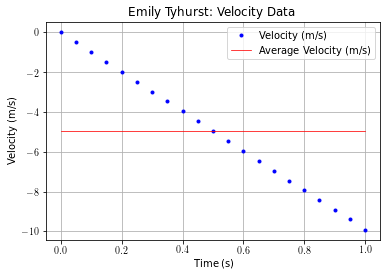

In [5]:
#### ---------- VELOCITY PLOTTING BLOCK ------------- ####
# In this section we plot the data from your experiment. #
# Here we are plotting force/mass next to acceleration.  #

plt.plot(time, velocity, 'b.', label="Velocity (m/s)")
plt.plot(time, fit_velocity, 'r-', label= "Average Velocity (m/s)")
plt.title(NAME+": Velocity Data")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Velocity_Data.png")
plt.show()
plt.clf()


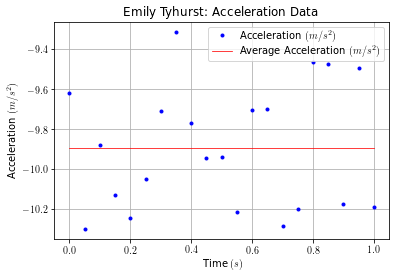

In [6]:
#### ---------- ACCELERATION PLOTTING BLOCK ------------- ####
# In this section we plot the data from your experiment. #
# Here we are plotting force/mass next to acceleration.  #

plt.plot(time, acceleration, 'b.', label="Acceleration $(m/s^2)$")
plt.plot(time, fit_acceleration, 'r-', label= "Average Acceleration $(m/s^2)$")
plt.title(NAME+": Acceleration Data")
plt.xlabel("Time $(s)$")
plt.ylabel("Acceleration $(m/s^2)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Acceleration_Data.png")
plt.show()
plt.clf()

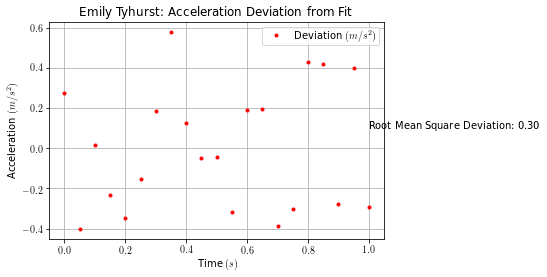

In [7]:
#### ---------- ACCELERATION DEVIATION BLOCK ---------- ####
# In this section we compare the data from your experiment #
# to determine more precisely if the hypothesis is true.   #

plt.plot(time, acceleration - fit_acceleration, 'r.', label="Deviation $(m/s^2)$")
plt.text(1,0.1, "Root Mean Square Deviation: {:.2f}".format(rmsd_acceleration))
plt.title(NAME+": Acceleration Deviation from Fit")
plt.xlabel("Time $(s)$")
plt.ylabel("Acceleration $(m/s^2)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Acceleration_Deviation.png")
plt.show()


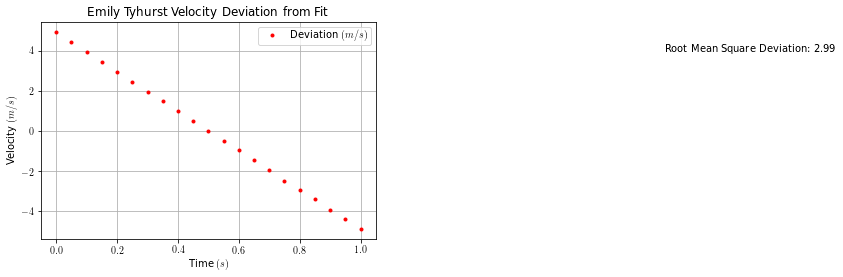

In [8]:
#### ----------- VELOCITY DEVIATION BLOCK ------------- ####
# In this section we compare the data from your experiment #
# to determine more precisely if the hypothesis is true.   #

plt.plot(time, velocity - fit_velocity, 'r.', label="Deviation $(m/s)$")
plt.text(2,4, "Root Mean Square Deviation: {:.2f}".format(rmsd_velocity))
plt.title(NAME+" Velocity Deviation from Fit")
plt.xlabel("Time $(s)$")
plt.ylabel("Velocity $(m/s)$")
plt.grid()
plt.legend()
plt.savefig(NAME.replace(" ","_")+"_Velocity_Deviation.png")
plt.show()

In [9]:
#### ---------------- OUTPUT BLOCK ---------------- ####
# Here we output the calculated values into a csv file #

output_filename = ACCELERATION_FILENAME[:ACCELERATION_FILENAME.find('.csv')]+'_calculated_values.csv'

data = pd.DataFrame({"time": time, "acceleration": acceleration, "velocity": velocity, 
                     "fit_acceleration": fit_acceleration, "fit_velocity": fit_velocity, 
                     "rmsd_acceleration": rmsd_acceleration, "rmsd_velocity": rmsd_velocity})
data.to_csv(output_filename)